In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

## bulkRNA ERCC1 KO in human iPSC cells (with controls - WT cultured cells)
### Data has triplicates (3 samples) for three time points (0, W2, W4)

In [2]:
# open csvs
working_dir = '/ocean/projects/cis240075p/asachan/datasets/iPSC_human_cells/bulk_RNA/edgeR_DEGs/'
df_K0W0 = pd.read_csv(working_dir + 'K0W0_DEG.csv')
df_K2W2 = pd.read_csv(working_dir + 'K2W2_DEG.csv')
df_K4W4 = pd.read_csv(working_dir + 'K4W4_DEG.csv')

In [3]:
# Function to convert column to numeric, coerce errors to NaN
def convert_to_numeric(df, column):
    df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

# Convert 'Adjustedpvalue' column to numeric
df_K0W0 = convert_to_numeric(df_K0W0, 'AdjustedPvalue')
df_K2W2 = convert_to_numeric(df_K2W2, 'AdjustedPvalue')
df_K4W4 = convert_to_numeric(df_K4W4, 'AdjustedPvalue')

# Sort the DataFrames by 'Adjustedpvalue'
df_K0W0 = df_K0W0.sort_values(by='AdjustedPvalue')
df_K2W2 = df_K2W2.sort_values(by='AdjustedPvalue')
df_K4W4 = df_K4W4.sort_values(by='AdjustedPvalue')


In [4]:
df_K0W0.head(1000) # -ve adjusted p-values, adjusted p-values get lower than p-values, column name was different from K0W0 and K4W4, column has some strings.

,Unnamed: 0,logFC,logCPM,F,PValue,AdjustedPvalue,gene_ID
6175,ENSG00000129824.16,-8.138272,7.214968,2687.058138,5.340980e-59,3.351411e-54,RPS4Y1
15977,ENSG00000185559.16,-2.798630,10.178677,1056.410105,5.660706e-45,1.776018e-40,DLK1
1121,ENSG00000070669.17,-3.688568,6.797319,960.864145,1.402509e-43,2.933535e-39,ASNS
6311,ENSG00000130707.18,-2.829201,7.429809,929.159630,4.346299e-43,6.818148e-39,ASS1
6998,ENSG00000135069.14,-2.878677,7.237614,903.197995,1.127485e-42,1.414971e-38,PSAT1
...,...,...,...,...,...,...,...
8464,ENSG00000143839.15,1.985189,-0.220820,38.701919,2.945566e-08,1.855736e-06,REN
15759,ENSG00000184661.14,1.084291,2.676645,38.588353,2.957309e-08,1.861266e-06,CDCA2
12330,ENSG00000168374.11,-0.454927,8.377573,38.552130,2.992990e-08,1.881835e-06,ARF4
5892,ENSG00000127241.18,0.691548,5.042793,38.481323,3.064737e-08,1.925017e-06,MASP1


# Plotting heatmaps for genes belonging to pathways of interest

In [28]:
# open specific sheets in the priority gene lists file
df_FAO = pd.read_excel('/Users/Akanksha/JugnuLab/data_analysis/datasets/bulk_RNA_iPSC/Heatmap_priority_genes.xlsx', sheet_name='FAO & Krebs cycle')
df_glycolysis = pd.read_excel('/Users/Akanksha/JugnuLab/data_analysis/datasets/bulk_RNA_iPSC/Heatmap_priority_genes.xlsx', sheet_name='Glycolysis')
df_cellcycle = pd.read_excel('/Users/Akanksha/JugnuLab/data_analysis/datasets/bulk_RNA_iPSC/Heatmap_priority_genes.xlsx', sheet_name='Cell cycle')
df_maturation = pd.read_excel('/Users/Akanksha/JugnuLab/data_analysis/datasets/bulk_RNA_iPSC/Heatmap_priority_genes.xlsx', sheet_name='Maturation')

In [5]:
# open specific sheets in the priority gene lists file
channel_genes = ['SLC1A1', 'SLC1A4', 'SLC2A1', 'SLC2A4', 'SLC5A1', 'SLC5A6', 'SLC6A3', 'SLC6A4', 'SLC7A5', 'SLC7A9', 'SLC10A1', 'SLC10A2', 'SLC16A1', 'SLC16A7', 'SLC22A1', 'SLC22A6', 'SLC25A1', 'SLC25A4', 'SLC30A1', 'SLC39A1']

In [17]:
pantetheine_genes = ['PANK1', 'PANK2', 'PANK3', 'PANK4', 'PPCDC', 'PPCS', 'COASY', 'VNN1', 'VNN2', 'VNN3P', 'CDO1', 'CSAD', 'CYP27A1', 'SLC5A6', 'SLC6A4']

In [32]:
# extract the gene names from the priority gene lists and store as list of strings
FAO_genes = df_FAO['Genes'].tolist()
glycolysis_genes = df_glycolysis['Genes'].tolist()
cellcycle_genes = df_cellcycle['Genes'].tolist()
maturation_genes = df_maturation['Genes'].tolist()

# convert the gene names to uppercase and remove any trailing whitespaces
FAO_genes = [gene.upper().strip() for gene in FAO_genes]
glycolysis_genes = [gene.upper().strip() for gene in glycolysis_genes]
cellcycle_genes = [gene.upper().strip() for gene in cellcycle_genes]
maturation_genes = [gene.upper().strip() for gene in maturation_genes]

# replace with updated names 
FAO_genes = ['ACADM', 'ACADVL', 'CPT1A', 'CPT1B', 'CD36', 'FABP3', 'ECH1', 'ACO2', 'LDHA', 'OGDH', 'SDHA', 'SDHB', 'SDHC', 'SDHD', 'MDH1', 'MDH2', 'FHP1', 'CS', 'ACADSB']
glycolysis_genes = ['HK1', 'HK2', 'PFKM', 'ALDOC', 'GAPDH', 'ENO2', 'SLC2A1', 'SLC2A4', 'PGM1', 'PGK1']
cellcycle_genes = ['CCNA2', 'CCNB1', 'CCNB2', 'CCND1', 'CCND2', 'CCNE1', 'CCNE2', 'CDK1', 'CDK4', 'CDK6', 'MCM2', 'CCND3', 'CDK2', 'CSNK2A1']
maturation_genes = ['MYH7', 'MYH6', 'TNNT2', 'TNNI3', 'TPM1', 'ACTC1', 'MYL2', 'MYL3', 'MYL7', 'MYL4', 'MYLK2', 'NPPA', 'NPPB', 'PLN', 'RYR2', 'KCNH2', 'SCN5A', 'KCNQ1', 'ATP2A2']

print(FAO_genes); print(glycolysis_genes); print(cellcycle_genes); print(maturation_genes)

['ACADM', 'ACADVL', 'CPT1A', 'CPT1B', 'CD36', 'FABP3', 'ECH1', 'ACO2', 'LDHA', 'OGDH', 'SDHA', 'SDHB', 'SDHC', 'SDHD', 'MDH1', 'MDH2', 'FHP1', 'CS', 'ACADSB']
['HK1', 'HK2', 'PFKM', 'ALDOC', 'GAPDH', 'ENO2', 'SLC2A1', 'SLC2A4', 'PGM1', 'PGK1']
['CCNA2', 'CCNB1', 'CCNB2', 'CCND1', 'CCND2', 'CCNE1', 'CCNE2', 'CDK1', 'CDK4', 'CDK6', 'MCM2', 'CCND3', 'CDK2', 'CSNK2A1']
['MYH7', 'MYH6', 'TNNT2', 'TNNI3', 'TPM1', 'ACTC1', 'MYL2', 'MYL3', 'MYL7', 'MYL4', 'MYLK2', 'NPPA', 'NPPB', 'PLN', 'RYR2', 'KCNH2', 'SCN5A', 'KCNQ1', 'ATP2A2']


#### FAO genes search in DEGs

In [33]:
# search for FAO genes in the K0W0, K2W2 and K4W4 dataframes
FAO_K0W0 = df_K0W0[df_K0W0['gene_ID'].isin(FAO_genes)]
FAO_K2W2 = df_K2W2[df_K2W2['gene_ID'].isin(FAO_genes)]
FAO_K4W4 = df_K4W4[df_K4W4['gene_ID'].isin(FAO_genes)]
# print the number of genes found in the K0W0 dataframe
print(len(FAO_genes), len(FAO_K0W0))
print(len(FAO_genes), len(FAO_K2W2))
print(len(FAO_genes), len(FAO_K4W4))
# store the genes not found in a list
FAO_K0W0_notfound = [gene for gene in FAO_genes if gene not in FAO_K0W0['gene_ID'].tolist()]
print(FAO_K0W0_notfound)

19 19
19 19
19 19
[]


#### Glycolysis genes search in DEGs

In [34]:
# search for glycolysis genes in the K0W0, K2W2 and K4W4 dataframes
glycolysis_K0W0 = df_K0W0[df_K0W0['gene_ID'].isin(glycolysis_genes)]
glycolysis_K2W2 = df_K2W2[df_K2W2['gene_ID'].isin(glycolysis_genes)]
glycolysis_K4W4 = df_K4W4[df_K4W4['gene_ID'].isin(glycolysis_genes)]
# print the number of genes found in the K0W0 dataframe
print(len(glycolysis_genes), len(glycolysis_K0W0))
print(len(glycolysis_genes), len(glycolysis_K2W2))
print(len(glycolysis_genes), len(glycolysis_K4W4))
# store the genes not found in a list
glycolysis_K0W0_notfound = [gene for gene in glycolysis_genes if gene not in glycolysis_K0W0['gene_ID'].tolist()]
print(glycolysis_K0W0_notfound)

# ADD PGK1 to glycolysis_K0W0, glycolysis_K2W2, glycolysis_K4W4
pgk1_K0W0 = []
pgk1_K2W2 = []
pgk1_K4W4 = []

10 10
10 10
10 10
[]


#### Cell-cycle genes search in DEGs

In [35]:
# search for cellcycle genes in the K0W0, K2W2 and K4W4 dataframes
cellcycle_K0W0 = df_K0W0[df_K0W0['gene_ID'].isin(cellcycle_genes)]
cellcycle_K2W2 = df_K2W2[df_K2W2['gene_ID'].isin(cellcycle_genes)]
cellcycle_K4W4 = df_K4W4[df_K4W4['gene_ID'].isin(cellcycle_genes)]
# print the number of genes found in the K0W0 dataframe
print(len(cellcycle_genes), len(cellcycle_K0W0))
print(len(cellcycle_genes), len(cellcycle_K2W2))
print(len(cellcycle_genes), len(cellcycle_K4W4))
# store the genes not found in a list
cellcycle_K0W0_notfound = [gene for gene in cellcycle_genes if gene not in cellcycle_K0W0['gene_ID'].tolist()]
print(cellcycle_K0W0_notfound)

14 14
14 14
14 14
[]


#### Maturation genes search in DEGs

In [36]:
# search for maturation genes in the K0W0, K2W2 and K4W4 dataframes
maturation_K0W0 = df_K0W0[df_K0W0['gene_ID'].isin(maturation_genes)]
maturation_K2W2 = df_K2W2[df_K2W2['gene_ID'].isin(maturation_genes)]
maturation_K4W4 = df_K4W4[df_K4W4['gene_ID'].isin(maturation_genes)]
# print the number of genes found in the K0W0 dataframe
print(len(maturation_genes), len(maturation_K0W0))
print(len(maturation_genes), len(maturation_K2W2))
print(len(maturation_genes), len(maturation_K4W4))
# store the genes not found in a list
maturation_K0W0_notfound = [gene for gene in maturation_genes if gene not in maturation_K0W0['gene_ID'].tolist()]
print(maturation_K0W0_notfound)

19 19
19 19
19 19
[]


#### Ion channel proteins

In [9]:
# search for channel genes in the K0W0, K2W2 and K4W4 dataframes
channel_K0W0 = df_K0W0[df_K0W0['gene_ID'].isin(channel_genes)]
channel_K2W2 = df_K2W2[df_K2W2['gene_ID'].isin(channel_genes)]
channel_K4W4 = df_K4W4[df_K4W4['gene_ID'].isin(channel_genes)]
# print the number of genes found in the K0W0 dataframe
print(len(channel_genes), len(channel_K0W0))
# store the genes not found in a list
channel_K0W0_notfound = [gene for gene in channel_genes if gene not in channel_K0W0['gene_ID'].tolist()]
print(channel_K0W0_notfound)

20 20
[]


#### Pantetheine genes

In [31]:
# search for vitamin B5 genes in the K0W0, K2W2 and K4W4 dataframes
pantetheine_K0W0 = df_K0W0[df_K0W0['gene_ID'].isin(pantetheine_genes)]
pantetheine_K2W2 = df_K2W2[df_K2W2['gene_ID'].isin(pantetheine_genes)]
pantetheine_K4W4 = df_K4W4[df_K4W4['gene_ID'].isin(pantetheine_genes)]
# print the number of genes found in the K0W0 dataframe
print(pantetheine_K0W0)

               Unnamed: 0     logFC    logCPM          F    PValue  \
5705   ENSG00000125779.24  0.516794  4.865834  19.533911  0.000034   
7171    ENSG00000135929.9  0.366550  3.568871   5.652936  0.020064   
5008    ENSG00000120137.7  0.192752  7.219531   5.511418  0.021624   
7590   ENSG00000138074.15  0.241819  5.362580   4.884847  0.030249   
9572   ENSG00000152782.19 -0.255116  4.427610   4.240192  0.043069   
7683   ENSG00000138621.12  0.475890  1.998273   3.744824  0.056871   
5886    ENSG00000127125.9 -0.179369  4.805022   2.077729  0.153767   
62696   ENSG00000293493.1 -1.806233 -3.211077   1.410887  0.238987   
3551   ENSG00000108576.10  0.721968 -0.545109   0.775984  0.381248   
4039    ENSG00000112299.8  0.135524 -2.350803   0.009414  0.922956   
4040   ENSG00000112303.14 -0.030451 -1.111949   0.001208  0.972367   
6157    ENSG00000129596.5  0.004499 -1.106196   0.000085  0.992687   
1033   ENSG00000068120.15 -0.049344  5.441868   0.229636  0.633236   
1996   ENSG000000931

In [32]:
#remove from pantetheine_K0W0, pantetheine_K2W2, pantetheine_K4W4  the VNN3P entry for whihc the ensemble transcript id is: ENSG00000293493.1
pantetheine_K0W0 = pantetheine_K0W0[pantetheine_K0W0['Unnamed: 0'] != 'ENSG00000093134.18']
pantetheine_K2W2 = pantetheine_K2W2[pantetheine_K2W2['Unnamed: 0'] != 'ENSG00000093134.18']
pantetheine_K4W4 = pantetheine_K4W4[pantetheine_K4W4['Unnamed: 0'] != 'ENSG00000093134.18']

In [33]:
# store the genes not found in a list
print(len(pantetheine_genes), len(pantetheine_K0W0))
b5_K0W0_notfound = [gene for gene in pantetheine_genes if gene not in pantetheine_K0W0['gene_ID'].tolist()]
print(b5_K0W0_notfound)

15 15
[]


#### Plot longitudinal heatmaps

In [34]:
# Function to prepare the data with upregulated and downregulated columns
def prepare_data(df, timepoint):
    df['upregulated'] = df['logFC'].apply(lambda x: x if x > 0 else 0)
    df['downregulated'] = df['logFC'].apply(lambda x: x if x < 0 else 0)
    df['upregulated_pvalue'] = df.apply(lambda row: row['AdjustedPvalue'] if row['logFC'] > 0 else np.nan, axis=1)
    df['downregulated_pvalue'] = df.apply(lambda row: row['AdjustedPvalue'] if row['logFC'] < 0 else np.nan, axis=1)
    df_up = df[['gene_ID', 'upregulated', 'upregulated_pvalue']].rename(columns={'upregulated': f'{timepoint}_up', 'upregulated_pvalue': f'{timepoint}_up_pvalue'})
    df_down = df[['gene_ID', 'downregulated', 'downregulated_pvalue']].rename(columns={'downregulated': f'{timepoint}_down', 'downregulated_pvalue': f'{timepoint}_down_pvalue'})
    return df_up, df_down

In [36]:
# Prepare data for each timepoint
k0w0_up, k0w0_down = prepare_data(pantetheine_K0W0, 'K0W0')
k2w2_up, k2w2_down = prepare_data(pantetheine_K2W2, 'K2W2')
k4w4_up, k4w4_down = prepare_data(pantetheine_K4W4, 'K4W4')

# Merge data into a single DataFrame for fold change
merged_df = pd.merge(k0w0_up[['gene_ID', 'K0W0_up']], k0w0_down[['gene_ID', 'K0W0_down']], on='gene_ID')
merged_df = pd.merge(merged_df, k2w2_up[['gene_ID', 'K2W2_up']], on='gene_ID')
merged_df = pd.merge(merged_df, k2w2_down[['gene_ID', 'K2W2_down']], on='gene_ID')
merged_df = pd.merge(merged_df, k4w4_up[['gene_ID', 'K4W4_up']], on='gene_ID')
merged_df = pd.merge(merged_df, k4w4_down[['gene_ID', 'K4W4_down']], on='gene_ID')

# Set gene_ID as the index
merged_df.set_index('gene_ID', inplace=True)

# Merge data into a single DataFrame for p-values
merged_df_p = pd.merge(k0w0_up[['gene_ID', 'K0W0_up_pvalue']], k0w0_down[['gene_ID', 'K0W0_down_pvalue']], on='gene_ID')
merged_df_p = pd.merge(merged_df_p, k2w2_up[['gene_ID', 'K2W2_up_pvalue']], on='gene_ID')
merged_df_p = pd.merge(merged_df_p, k2w2_down[['gene_ID', 'K2W2_down_pvalue']], on='gene_ID')
merged_df_p = pd.merge(merged_df_p, k4w4_up[['gene_ID', 'K4W4_up_pvalue']], on='gene_ID')
merged_df_p = pd.merge(merged_df_p, k4w4_down[['gene_ID', 'K4W4_down_pvalue']], on='gene_ID')

# Set gene_ID as the index
merged_df_p.set_index('gene_ID', inplace=True)

# Find significant points
significant_points = np.where(merged_df_p.values < 0.05)

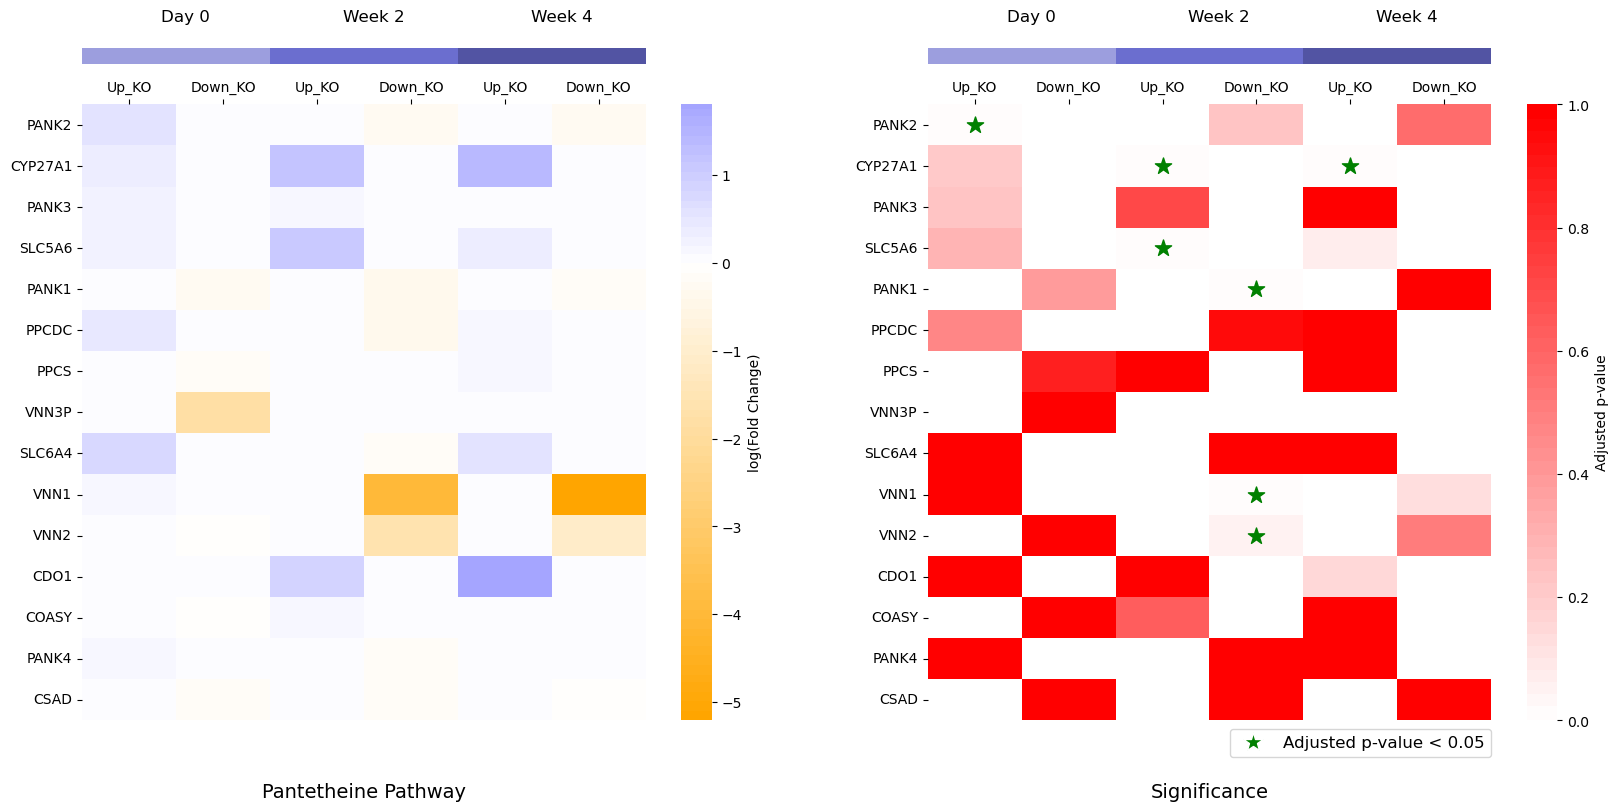

In [37]:

################################################### Plotting code ###################################################
# Define the new labels for the x-axis
new_labels = ['Up_KO', 'Down_KO', 'Up_KO', 'Down_KO', 'Up_KO', 'Down_KO']
# Define the positions for the week labels
week_labels_positions = [(0.1, 2.1, 'Day 0'), (2.1, 4.1, 'Week 2'), (4.1, 6.1, 'Week 4')]

# Create a custom colormap for fold change values
colors_list = ['orange', 'white', 'blue']
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'custom_blue_orange'
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list(cmap_name, colors_list, N=n_bins)

# Create a custom colormap for p-values
colors_list_p = ['lightgreen', 'white', 'red']
cmap_name_p = 'custom_red_green'
custom_cmap_p = mpl.colors.LinearSegmentedColormap.from_list(cmap_name_p, colors_list_p, N=n_bins)

# Plot the heatmaps
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Fold change heatmap
ax1 = sns.heatmap(merged_df, cmap=custom_cmap, center=0, cbar_kws={'label': 'log(Fold Change)'}, ax=axes[0])
ax1.set_xlabel('Pantetheine Pathway', fontsize=14)
ax1.xaxis.tick_top()
ax1.set_ylabel('')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)
ax1.set_xticklabels(new_labels)

# P-value heatmap
ax2 = sns.heatmap(merged_df_p, cmap=custom_cmap_p, center=0, cbar_kws={'label': 'Adjusted p-value'}, ax=axes[1])
ax2.set_xlabel('Significance', fontsize=14)
ax2.xaxis.tick_top()
ax2.set_ylabel('')
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)
ax2.set_xticklabels(new_labels)

# Add rectangular, spaced, and very thin colored bars at the top
bar_y_position = ax1.get_position().y1 + 0.05
label_y_position = bar_y_position + 0.05
bar_height = 0.02
number_of_columns_in_heatmap = 6

# Get colors from the tab20c colormap for the bars
colors_for_bars = [plt.get_cmap('tab20b')(i) for i in range(0,4)]
colors_for_bars.reverse()

# Add bars
for idx, (start, end) in enumerate([(0, 2), (2, 4), (4, 6)]):
    fig.patches.extend([mpl.patches.Rectangle(
        (axes[0].get_position().x0 + start / number_of_columns_in_heatmap * (axes[0].get_position().width), bar_y_position),
        (end-start) / number_of_columns_in_heatmap * (axes[0].get_position().width), bar_height,
        linewidth=1, edgecolor=None, facecolor=colors_for_bars[idx], transform=fig.transFigure, clip_on=False
    )])
    fig.patches.extend([mpl.patches.Rectangle(
        (axes[1].get_position().x0 + start / number_of_columns_in_heatmap * (axes[1].get_position().width), bar_y_position),
        (end-start) / number_of_columns_in_heatmap * (axes[1].get_position().width), bar_height,
        linewidth=1, edgecolor=None, facecolor=colors_for_bars[idx], transform=fig.transFigure, clip_on=False
    )])

# Add week labels on top for both heatmaps
for start, end, label in week_labels_positions:
    fig.text(
        (axes[0].get_position().x0 + axes[0].get_position().width * (start + end) / 2 / number_of_columns_in_heatmap), 
        label_y_position, label, ha='center', va='bottom', fontsize=12, transform=fig.transFigure
    )
    fig.text(
        (axes[1].get_position().x0 + axes[1].get_position().width * (start + end) / 2 / number_of_columns_in_heatmap), 
        label_y_position, label, ha='center', va='bottom', fontsize=12, transform=fig.transFigure
    )

# Adjust x-axis label position below the heatmap
ax1.xaxis.set_label_coords(0.5, -0.1, transform=ax1.transAxes)
ax2.xaxis.set_label_coords(0.5, -0.1, transform=ax2.transAxes)

# Plot stars for significant points
for y, x in zip(*significant_points):
    ax2.scatter(x + 0.5, y + 0.5, marker='*', color='green', s=150, zorder = 5)
# Create a custom legend for the star markers
star_patch = mpl.lines.Line2D([0], [0], marker='*', color='w', label='Adjusted p-value < 0.05', markerfacecolor='green', markersize=15)
# Add the legend to the significance plot
ax2.legend(handles=[star_patch], loc='lower right', fontsize=12, bbox_to_anchor=(1.0, -0.06), borderaxespad=0.)

plt.show()

## Separate Up and Down regulation (and get top 100)

In [12]:
# write a function to separate the upregulated and downregulated genes
def separate_genes(df):
    upregulated = df[df['logFC'] > 1]
    downregulated = df[df['logFC'] < -1]
    return upregulated, downregulated

In [13]:
# get the upregulated and downregulated genes for each timepoint pick top 100 based on the sorted adjusted p-values)
k0w0_upregulated, k0w0_downregulated = separate_genes(df_K0W0)
k2w2_upregulated, k2w2_downregulated = separate_genes(df_K2W2)
k4w4_upregulated, k4w4_downregulated = separate_genes(df_K4W4)

In [14]:
# get the top 100 upregulated and downregulated genes for each timepoint
top_100_k0w0_upregulated = k0w0_upregulated.head(100)
top_100_k0w0_downregulated = k0w0_downregulated.head(100)
top_100_k2w2_upregulated = k2w2_upregulated.head(100)
top_100_k2w2_downregulated = k2w2_downregulated.head(100)
top_100_k4w4_upregulated = k4w4_upregulated.head(100)
top_100_k4w4_downregulated = k4w4_downregulated.head(100)


In [17]:
# save as csvs
top_100_k0w0_upregulated.to_csv('top_100_k0w0_upregulated.csv', index=False)
top_100_k0w0_downregulated.to_csv('top_100_k0w0_downregulated.csv', index=False)
top_100_k2w2_upregulated.to_csv('top_100_k2w2_upregulated.csv', index=False)
top_100_k2w2_downregulated.to_csv('top_100_k2w2_downregulated.csv', index=False)
top_100_k4w4_upregulated.to_csv('top_100_k4w4_upregulated.csv', index=False)
top_100_k4w4_downregulated.to_csv('top_100_k4w4_downregulated.csv', index=False)

## Get common DEGs between W2 and W4

In [15]:
# write a function to merge the dfs at W2 and W4 at the common gene_IDs
def merge_dfs(df1, df2):
    merged_df = pd.merge(df1, df2, on='gene_ID', how='inner')
    return merged_df

In [36]:
# get the common DEGs between K2W2 and K4W4 (upregulated and downregulated)
common_w2_w4_upregulated = merge_dfs(k2w2_upregulated, k4w4_upregulated)
common_w2_w4_downregulated = merge_dfs(k2w2_downregulated, k4w4_downregulated)
common_w2_w4_all = merge_dfs(df_K2W2, df_K4W4) #has no fold chnage criteria, only significance criteria for foldchange values
#remove the rows where the adjusted p-value is greater than 0.05 for both W2 and W4
common_w2_w4_upregulated = common_w2_w4_upregulated[(common_w2_w4_upregulated['AdjustedPvalue_x'] < 0.01) & (common_w2_w4_upregulated['AdjustedPvalue_y'] < 0.01)]
common_w2_w4_downregulated = common_w2_w4_downregulated[(common_w2_w4_downregulated['AdjustedPvalue_x'] < 0.01) & (common_w2_w4_downregulated['AdjustedPvalue_y'] < 0.01)]
common_w2_w4_all = common_w2_w4_all[(common_w2_w4_all['AdjustedPvalue_x'] < 0.01) & (common_w2_w4_all['AdjustedPvalue_y'] < 0.01)]

In [38]:
len(common_w2_w4_upregulated), len(common_w2_w4_downregulated), len(common_w2_w4_all)

(186, 223, 1232)